# **MNA Circuit Solver Using Python**


# importing necessary libraries

In [ ]:
import numpy as np
from sys import argv


# defining shortcut words for .circuit, .ac, .end

in MNA circuit solver GND is taken as reference and its voltage is taken as zero

node_dict is used to map the node names to numerical values


In [ ]:
c = '.circuit'
a = '.ac'
e = '.end'

count = 1
node_dict = {'GND': 0}

# defining classes for circuit elements

classes for resistors, inductors, capacitors is defined to encapsulate the details of each circuit element.

In [ ]:
resistors = []


class Res:
    def __init__(self, name, from_node, to_node, value):
        self.name = name
        self.from_node = from_node
        self.to_node = to_node
        self.value = value


inductors = []


class inductor:
    def __init__(self, name, from_node, to_node, value):
        self.name = name
        self.from_node = from_node
        self.to_node = to_node
        self.value = value


capacitors = []


class capacitor:
    def __init__(self, name, from_node, to_node, value):
        self.name = name
        self.from_node = from_node
        self.to_node = to_node
        self.value = value

classes for voltage sources, ac voltage sources, current sources, ac current source

is defined to encapsulate the details of each circuit element

In [ ]:
voltages = []


class voltage:
    def __init__(self, name, from_node, to_node, value):
        self.name = name
        self.from_node = from_node
        self.to_node = to_node
        self.value = value


voltages_ac = []


class voltage_ac:
    def __init__(self, name, from_node, to_node, value, phase):
        self.name = name
        self.from_node = from_node
        self.to_node = to_node
        self.value = value
        self.phase = phase


currents = []


class current:
    def __init__(self, name, from_node, to_node, value):
        self.name = name
        self.from_node = from_node
        self.to_node = to_node
        self.value = value



currents_ac = []


class current_ac:
    def __init__(self, name, from_node, to_node, value, phase):
        self.name = name
        self.from_node = from_node
        self.to_node = to_node
        self.value = value
        self.phase = phase




classes for vcvs , vccs, ccvs and cccs is

defined to encapsulate the details of each circuit element

In [ ]:
vcvs = []


class E:
    def __init__(self, name, from_node_1, to_node_1, from_node_2, to_node_2, value):
        self.name = name
        self.from_node_1 = from_node_1
        self.to_node_1 = to_node_1
        self.from_node_2 = from_node_2
        self.to_node_2 = to_node_2
        self.value = value


vccs = []


class G:
    def __init__(self, name, from_node_1, to_node_1, from_node_2, to_node_2, value):
        self.name = name
        self.from_node_1 = from_node_1
        self.to_node_1 = to_node_1
        self.from_node_2 = from_node_2
        self.to_node_2 = to_node_2
        self.value = value


ccvs = []


class H:
    def __init__(self, name, from_node, to_node, Voltage_name, value):
        self.name = name
        self.from_node = from_node
        self.to_node = to_node
        self.value = value
        self.voltage = Voltage_name


cccs = []


class F:
    def __init__(self, name, from_node, to_node, Voltage_name, value):
        self.name = name
        self.value = value
        self.from_node = from_node
        self.to_node = to_node
        self.voltage = Voltage_name

# Checking whether the input arguments are correct

In [ ]:
argv = ["/content/APL_assignment2.py" , "/content/ck3.netlist" ]


if len(argv) != 2:
    print("invalid no of input files/invalid file")
    exit(0)

# File validation
Reading the file and checking whether the given netlist file is in valid format

else printing an error statement indicating the line at which error had occured

if the file is corrupted or if we unable to open file then printing the error statement "invalid input file"

In [ ]:
valid = True;
try:
    with open(argv[1]) as f:
        data = f.readlines()
        start_index = -1
        stop_index = -3
        for line in data:
            if c == line[:len(c)]:
                start_index = data.index(line)
                type_of_circuit = "DC"
            elif a == line[:len(a)]:
                ac_index = data.index(line)
                type_of_circuit = "AC"
                frequency = float(line.split(" ")[2])
            elif e == line[:len(e)]:
                stop_index = data.index(line)
        if start_index >= stop_index:
            print("invalid data format in file")
            valid = False;
            exit(0)
except IOError:
    print("invalid input file")
    valid = False;
    exit(0)

# Creating objects for various circuit elements

initially, the line is split into words and comments are also removed.

The netlist file contains the information of circuit elements such as its nodes and values in each line.

Reading each line and assigning the information of circuit element to the object of corresponding class

and storing it to the corresponding objects list

if a statement contains invalid circuit representation then printing an error a statement indicating the line at which error had occurred.


In [ ]:
# iterating the loop for every line in the file
if valid:
  for line in data[start_index+1:stop_index]:
    words = line.replace('/n', ' ').split('#')[0].split()
    if words == []:
        continue
    else:
        circuit_element = words[0]
        # analysing circuit elements such as R, L, C, V, I
        if circuit_element[0] in ("R", "L", "C"):
            if len(words) == 4:
                # extracting the tokens for future reference
                name = words[0]
                from_node = words[1]
                to_node = words[2]
                value = float(words[3])

                if from_node.isalnum() != True or to_node.isalnum() != True:
                    print("the node is not represented in alphanumeral format in line{}".format(
                        data.index(line)+1))
                    valid = False;
                    exit(0)
                if from_node not in node_dict:
                    node_dict[from_node] = count
                    count = count + 1
                if to_node not in node_dict:
                    node_dict[to_node] = count
                    count = count + 1

                if circuit_element[0] == "R":
                    resistors.append(
                        Res(name, from_node, to_node, value))
                if circuit_element[0] == "L":
                    inductors.append(
                        inductor(name, from_node, to_node, value))
                if circuit_element[0] == "C":
                    capacitors.append(
                        capacitor(name, from_node, to_node, value))
            else:
                print("invalid no of parameters for given element in line{}".format(
                    data.index(line)+1))
                valid = False;
                exit(0)

        elif circuit_element[0] in ("V", "I"):
            if (type_of_circuit) == "DC":
                name = words[0]
                from_node = words[1]
                to_node = words[2]
                value = float(words[4])
            if (type_of_circuit) == "AC":
                name = words[0]
                from_node = words[1]
                to_node = words[2]
                value = float(words[4])
                phase = float(words[5])
            if from_node.isalnum() != True or to_node.isalnum() != True:
                print("the node is not represented in alphanumeral format in line{}".format(
                    data.index(line)+1))
                valid = False;
                exit(0)
                if from_node not in node_dict:
                    node_dict[from_node] = count
                    count = count + 1
                if to_node not in node_dict:
                    node_dict[to_node] = count
                    count = count + 1
            if (type_of_circuit) == "DC":
                if circuit_element[0] == "V":
                    voltages.append(
                        voltage(name, from_node, to_node, value))
                if circuit_element[0] == "I":
                    currents.append(
                        current(name, from_node, to_node, value))
            if (type_of_circuit) == "AC":
                if circuit_element[0] == "V":
                    voltages_ac.append(voltage_ac(
                        name, from_node, to_node, value/2, phase))
                if circuit_element[0] == "I":
                    currents_ac.append(current_ac(
                        name, from_node, to_node, value, phase))

        # analysing circuit elements such as E or G
        elif circuit_element[0] in ("E", "G"):

            if len(words) == 6:

                # extracting the tokens for future reference
                name = words[0]
                from_node_1 = words[1]
                to_node_1 = words[2]
                from_node_2 = words[3]
                to_node_2 = words[4]
                value = float(words[5])

                if (from_node_1.isalnum() != True) or (to_node_1.isalnum() != True) or (from_node_2.isalnum() != True) or (to_node_2.isalnum() != True):
                    print("the node is not represented in alphanumeral format in line{}".format(
                        data.index(line)+1))
                    valid = False;
                    exit(0)
            else:
                print("invalid no of parameters for given element in line{}".format(
                    data.index(line)+1))
                exit(0)
            if from_node_1 not in node_dict:
                node_dict[from_node_1] = count
                count = count + 1
            if to_node_1 not in node_dict:
                node_dict[to_node_1] = count
                count = count + 1
            if from_node_2 not in node_dict:
                node_dict[from_node_2] = count
                count = count + 1
            if to_node_2 not in node_dict:
                node_dict[to_node_2] = count
                count = count + 1

            if circuit_element[0] == "E":
                vcvs.append(E(name, from_node_1, to_node_1,
                            from_node_2, to_node_2, value))
            if circuit_element[0] == "G":
                vccs.append(G(name, from_node_1, to_node_1,
                            from_node_2, to_node_2, value))

        # analysing circuit elements such as H , F
        elif circuit_element[0] in ("H", "F"):
            if len(words) == 5:

                # extracting the tokens for future reference
                name = words[0]
                from_node = words[1]
                to_node = words[2]
                Voltage_name = words[3]
                value = float(words[4])
                if from_node not in node_dict:
                    node_dict[from_node_1] = count
                    count = count + 1
                if to_node not in node_dict:
                    node_dict[from_node_1] = count
                    count = count + 1
                if from_node.isalnum() != True or to_node.isalnum() != True:
                    print("the node is not represented in alphanumeral format in line{}".format(
                        data.index(line)+1))
                    valid = False;
                    exit(0)
            else:
                print("invalid no of parameters for given element in line{}".format(
                    data.index(line)+1))
                exit(0)
            if circuit_element[0] == "E":
                ccvs.append(
                    E(name, from_node, to_node, Voltage_name, value))
            if circuit_element[0] == "F":
                cccs.append(
                    F(name, from_node, to_node, Voltage_name, value))

        else:
            print("invalid representation of circuit in line{}".format(
                data.index(line)+1))
            exit(0)

# Constructing Nodal matrix(DC)
for the circuit type DC,
each element such as the resistor, voltage source, current source have its corresponding MNA stamp.

initially no of rows is equal to no of nodes in the circuit and no of voltage sources and control voltage sources.

using these MNA stamps nodal matrix is constructed.

matrix is updated with each stamp finally to produce a nodal matrix.



In [ ]:
# constructing A and B matrix;
no_of_rows = len(node_dict)+len(voltages)+len(vcvs)
# no.of.rows = no.of.columns
A = np.zeros((no_of_rows, no_of_rows))
B = np.zeros(no_of_rows)



# Resistor(DC)

The resistor has MNA stamp as shown below.

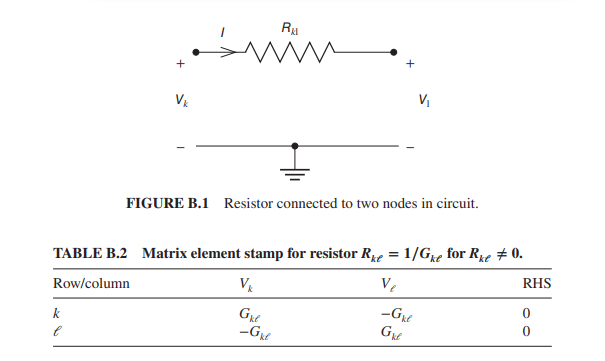

In [ ]:
if valid and type_of_circuit == "DC":
    for resistor in resistors:
        A[node_dict[resistor.from_node],
            node_dict[resistor.from_node]] += 1/resistor.value
        A[node_dict[resistor.from_node],
            node_dict[resistor.to_node]] += -1/resistor.value
        A[node_dict[resistor.to_node],
            node_dict[resistor.from_node]] += -1/resistor.value
        A[node_dict[resistor.to_node],
            node_dict[resistor.to_node]] += 1/resistor.value

# Current Sources(DC)
The current source has MNA stamp as shown below.

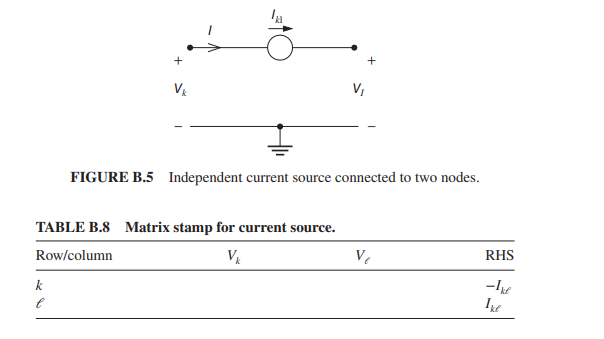

In [ ]:
if valid and type_of_circuit == "DC":
        for current in currents:
          B[node_dict[from_node]] += float(current.value)
          B[node_dict[to_node]] += -float(current.value)


# Voltage Source(DC)

The MNA stamp for voltage source is as follows:

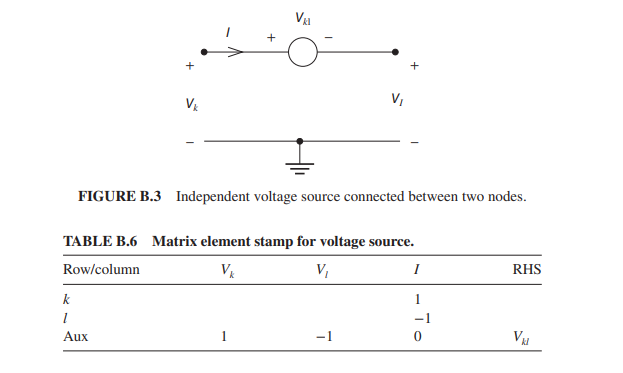

In [ ]:
if valid and type_of_circuit == "DC":
    for voltage in voltages:
      A[node_dict[voltage.from_node], len(
          node_dict)+voltages.index(voltage)] += 1
      A[node_dict[voltage.to_node], len(
          node_dict)+voltages.index(voltage)] += -1
      A[len(node_dict)+voltages.index(voltage),
        node_dict[voltage.from_node]] += 1
      A[len(node_dict)+voltages.index(voltage),
        node_dict[voltage.to_node]] += -1
      B[len(node_dict)+voltages.index(voltage)] = voltage.value

# Voltage Controlled Voltage Source(DC)

The MNA stamp for voltage-controlled voltage source is as follows

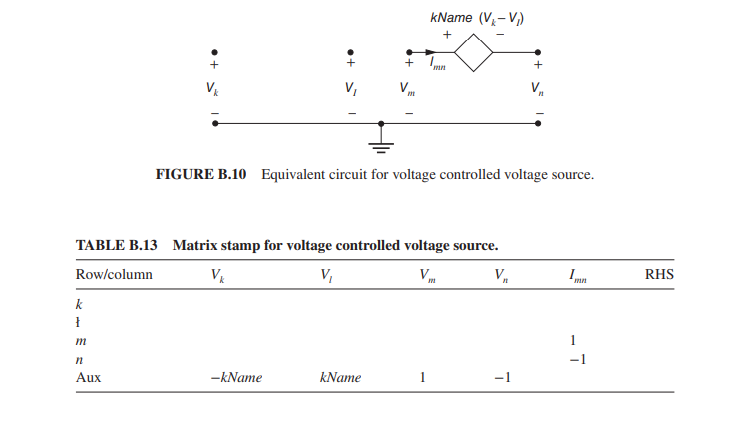

In [ ]:
if valid and type_of_circuit == "DC":
    for E in vcvs:
      A[node_dict[E.from_node_1], len(
          node_dict)+len(voltages)+vcvs.index(E)] += 1
      A[node_dict[E.to_node_1], len(
          node_dict)+len(voltages)+vcvs.index(E)] += -1
      A[len(node_dict)+len(voltages)+vcvs.index(E),
        node_dict[E.to_node_2]] += E.value
      A[len(node_dict)+len(voltages)+vcvs.index(E),
        node_dict[E.from_node_2], ] += -E.value
      A[len(node_dict)+len(voltages)+vcvs.index(E),
        node_dict[E.from_node_1]] += 1
      A[len(node_dict)+len(voltages)+vcvs.index(E),
        node_dict[E.to_node_1]] += -1

# Voltage Controlled Current Source(DC)

The MNA stamp for voltage-controlled current source is as follows

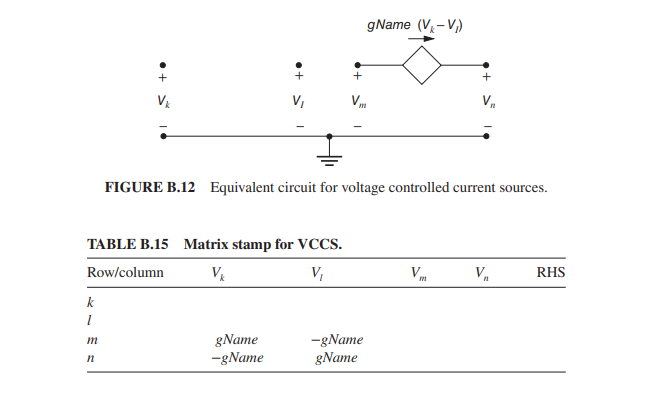

In [ ]:
if valid and type_of_circuit == "DC":
  for G in vccs:
    A[node_dict[G.to_node_1], node_dict[G.from_node_2]] += G.value
    A[node_dict[G.from_node_1], node_dict[G.from_node_2]] += -G.value
    A[node_dict[G.to_node_1], node_dict[G.to_node_2]] += -G.value
    A[node_dict[G.from_node_1], node_dict[G.to_node_2]] += G.value

# Current Controlled Voltage Source(DC)

The MNA stamp for current-controlled voltage source is as follows

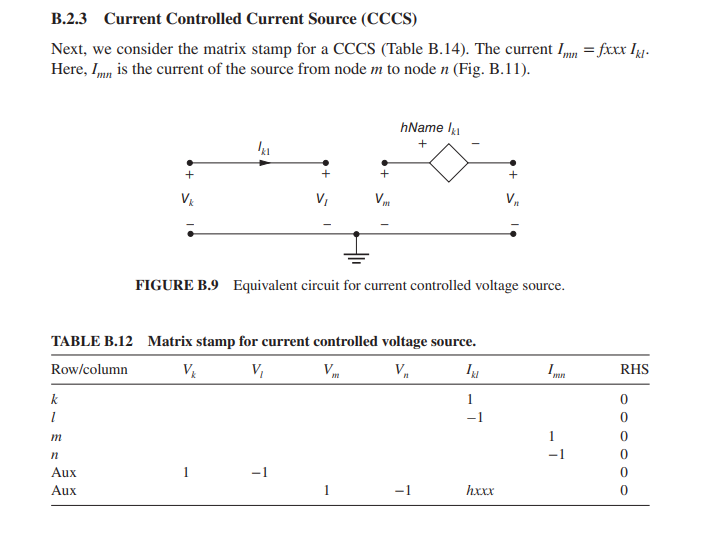


In [ ]:
if valid and type_of_circuit == "DC":
    for H in ccvs:
      for voltage in voltages:
          if voltage.name == H.name:
              index = voltages.index(voltage)
          else:
              print("circuit is invalid")
              valid = False;
              exit(0)
      k = node_dict[voltages[index].from_node]
      l = node_dict[voltages[index].to_node]
      A[k, len(node_dict)+index] += 1
      A[l, len(node_dict)+index] += -1
      A[H.from_node, len(node_dict)+len(voltages_ac) +
        len(vcvs)+ccvs.index(H)] += 1
      A[H.to_node, len(node_dict)+len(voltages_ac) +
        len(vcvs)+ccvs.index(H)] += -1
      A[len(node_dict)+index, k] += 1
      A[len(node_dict)+index, l] += -1
      A[len(voltages)+len(vcvs)+ccvs.index(H), H.from_node] += 1
      A[len(voltages)+len(vcvs)+ccvs.index(H), H.to_node] += -1
      A[len(voltages)+len(vcvs)+ccvs.index(H),
        len(node_dict)+index] += H.value


# Current Controlled Current Source(DC)

The MNA stamp for current-controlled current source is as follows

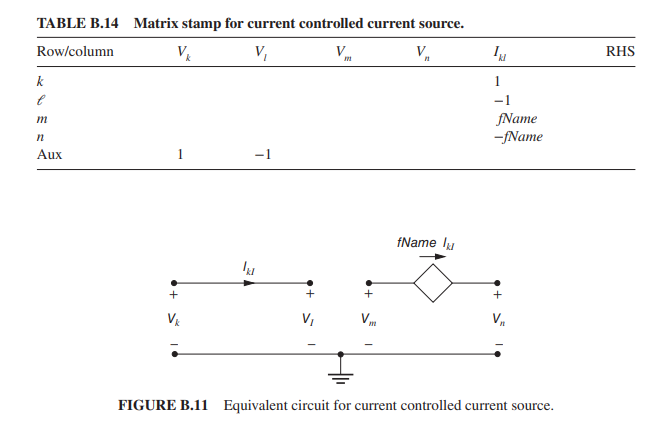

In [ ]:
if valid and type_of_circuit == "DC":
  for F in cccs:
      for voltage in voltages:
          if voltage.name == F.name:
              index = voltages.index(voltage)
          else:
              print("circuit is invalid")
              valid = False;
              exit(0)
      k = node_dict[voltages[index].from_node]
      l = node_dict[voltages[index].to_node]
      A[k, len(node_dict)+index] += 1
      A[l, len(node_dict)+index] += 1
      A[node_dict[F.from_node], len(node_dict)+index] += F.value
      A[node_dict[F.to_node], len(node_dict)+index] += -F.value
      A[len(node_dict)+index, k] += 1
      A[len(node_dict)+index, l] += -1

# Constructing Nodal matrix(AC)
for the circuit type AC,
each element such as the resistor, capacitor, inductor,voltage source, and current source have its corresponding MNA stamp.

initially no of rows is equal to no of nodes in the circuit and no of voltage sources and control voltage sources.

using these MNA stamps nodal matrix is constructed.

matrix is updated with each stamp finally to produce a nodal matrix.

In [ ]:
# constructing A and B matrix;
if valid and type_of_circuit == "AC":
    no_of_rows = len(node_dict)+len(voltages_ac)+len(vcvs)+len(ccvs)
    # no.of.rows = no.of.columns
    A = np.zeros((no_of_rows, no_of_rows), dtype=complex)
    B = np.zeros(no_of_rows, dtype=complex)

# Resistor(AC)

The resistor has MNA stamp as shown below.

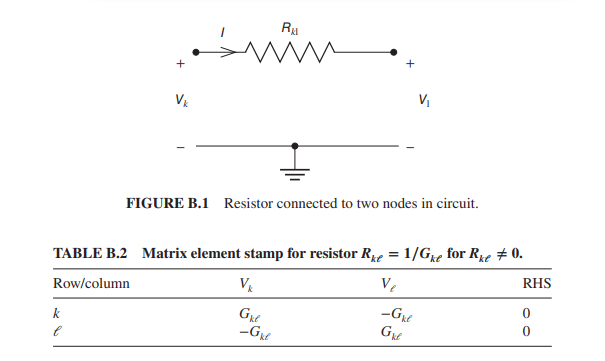

In [ ]:
if valid and type_of_circuit == "AC":
    for resistor in resistors:
        A[node_dict[resistor.from_node],
            node_dict[resistor.from_node]] += 1/resistor.value
        A[node_dict[resistor.from_node],
            node_dict[resistor.to_node]] += -1/resistor.value
        A[node_dict[resistor.to_node],
            node_dict[resistor.from_node]] += -1/resistor.value
        A[node_dict[resistor.to_node],
            node_dict[resistor.to_node]] += 1/resistor.value

# Current Sources(AC)
The current source has MNA stamp as shown below.

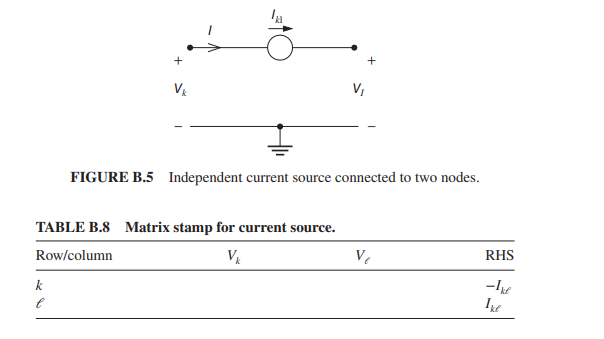

In [ ]:
if valid and type_of_circuit == "AC":
    for current in currents_ac:
        B[node_dict[from_node]] += float(current.value)*(
            np.cos(current.phase) + np.sin(current.phase)*1j)
        B[node_dict[to_node]] += - \
            float(current.value) * \
            (np.cos(current.phase) + np.sin(current.phase)*1j)

# Voltage Source(AC)

The MNA stamp for voltage source is as follows:

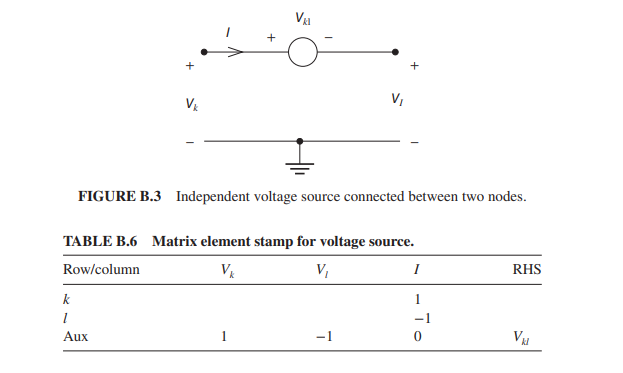

In [ ]:
if valid and type_of_circuit == "AC":
    for voltage_ac in voltages_ac:
        A[node_dict[voltage_ac.from_node], len(
            node_dict)+voltages_ac.index(voltage_ac)] += 1
        A[node_dict[voltage_ac.to_node], len(
            node_dict)+voltages_ac.index(voltage_ac)] += -1
        A[len(node_dict)+voltages_ac.index(voltage_ac),
          node_dict[voltage_ac.from_node]] += 1
        A[len(node_dict)+voltages_ac.index(voltage_ac),
          node_dict[voltage_ac.to_node]] += -1
        B[len(node_dict)+voltages_ac.index(voltage_ac)] += float(voltage_ac.value) * \
            (np.cos(voltage_ac.phase) + np.sin(voltage_ac.phase)*1j)

# Capacitor(AC)
The MNA stamp for capacitor is as follows

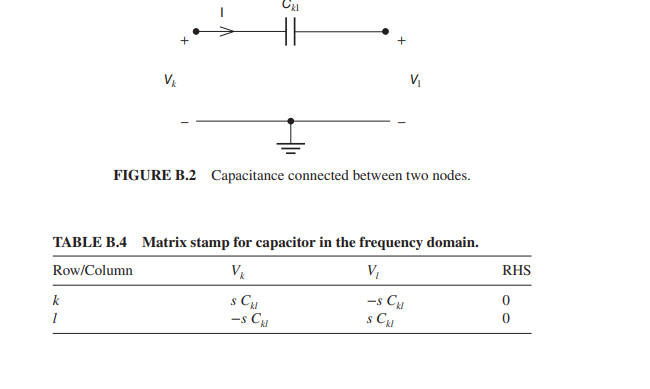


In [ ]:
if valid and type_of_circuit == "AC":
    for c in capacitors:
        A[node_dict[c.from_node], node_dict[c.from_node]] += (c.value)*2*np.pi*frequency*1j
        A[node_dict[c.from_node], node_dict[c.to_node]] += -(c.value)*2*np.pi*frequency*1j
        A[node_dict[c.to_node], node_dict[c.from_node]] += -(c.value)*2*np.pi*frequency*1j
        A[node_dict[c.to_node], node_dict[c.to_node]] += (c.value)*2*np.pi*frequency*1j

# Inductor(AC)

The MNA stamp for inductance is as follows

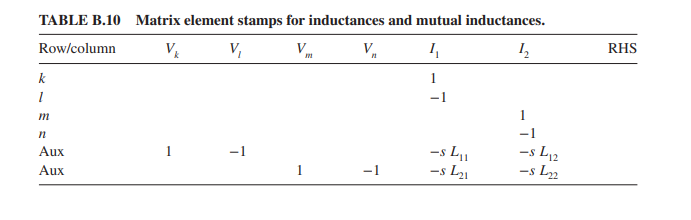

In [ ]:
if valid and type_of_circuit == "AC":
    for L in inductors:
      A[node_dict[L.from_node], node_dict[L.from_node]] += 1 /(L.value*2*np.pi*frequency*1j)
      A[node_dict[L.from_node], node_dict[L.to_node]] += -1/(L.value*2*np.pi*frequency*1j)
      A[node_dict[L.to_node], node_dict[L.from_node]] += -1/(L.value*2*np.pi*frequency*1j)
      A[node_dict[L.to_node], node_dict[L.to_node]] += 1/(L.value*2*np.pi*frequency*1j)

# Voltage Controlled Voltage Source(AC)

The MNA stamp for voltage-controlled voltage source is as follows

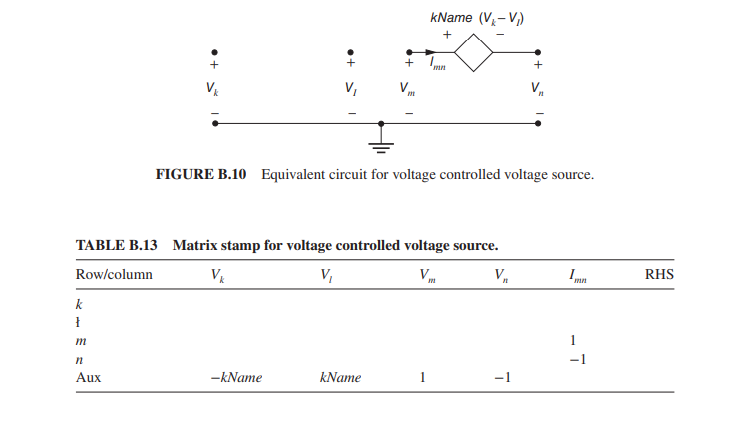

In [ ]:
if valid and type_of_circuit == "AC":
    for E in vcvs:
      A[node_dict[E.from_node_1], len(
          node_dict)+len(voltages)+vcvs.index(E)] += 1
      A[node_dict[E.to_node_1], len(
          node_dict)+len(voltages)+vcvs.index(E)] += -1
      A[len(node_dict)+len(voltages)+vcvs.index(E),
        node_dict[E.to_node_2]] += E.value
      A[len(node_dict)+len(voltages)+vcvs.index(E),
        node_dict[E.from_node_2]] += -E.value
      A[len(node_dict)+len(voltages)+vcvs.index(E),
        node_dict[E.from_node_1]] += 1
      A[len(node_dict)+len(voltages)+vcvs.index(E),
        node_dict[E.to_node_1]] += -1

# Voltage Controlled Current Source(AC)

The MNA stamp for voltage-controlled current source is as follows

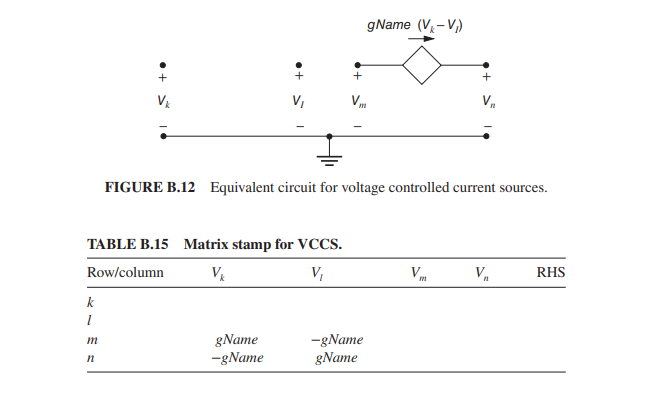

In [ ]:
if valid and type_of_circuit == "AC":
    for G in vccs:
        A[node_dict[G.to_node_1], node_dict[G.from_node_2]] += G.value
        A[node_dict[G.from_node_1], node_dict[G.from_node_2]] += -G.value
        A[node_dict[G.to_node_1], node_dict[G.to_node_2]] += -G.value
        A[node_dict[G.from_node_1], node_dict[G.to_node_2]] += G.value

# Current Controlled Voltage Source(DC)

The MNA stamp for current-controlled voltage source is as follows

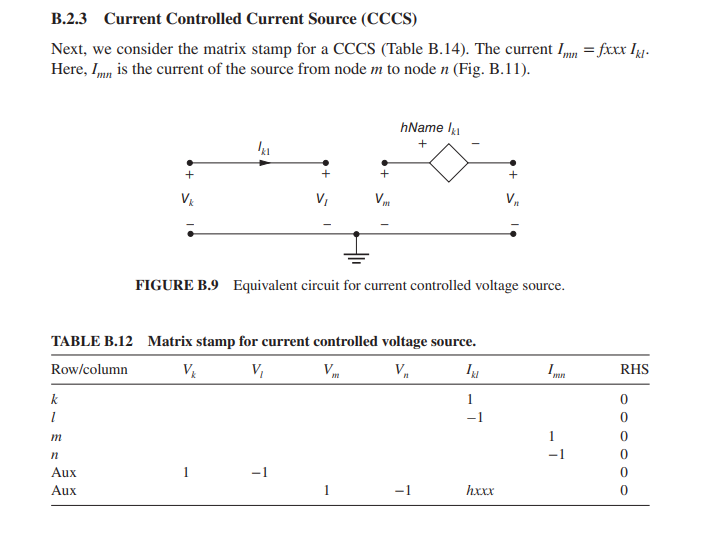

In [ ]:
if valid and type_of_circuit == "AC":
    for H in ccvs:
      for voltage_ac in voltages_ac:
          if voltage_ac.name == H.name:
              index = voltages_ac.index(voltage_ac)
          else:
              print("circuit is invalid")
              valid = False;
              exit(0)
      k = node_dict[voltages_ac[index].from_node]
      l = node_dict[voltages_ac[index].to_node]
      A[k, len(node_dict)+index] += 1
      A[l, len(node_dict)+index] += -1
      A[H.from_node, len(node_dict)+len(voltages_ac) +
        len(vcvs)+ccvs.index(H)] += 1
      A[H.to_node, len(node_dict)+len(voltages_ac) +
        len(vcvs)+ccvs.index(H)] += -1
      A[len(node_dict)+index, k] += 1
      A[len(node_dict)+index, l] += -1
      A[len(voltages_ac)+len(vcvs)+ccvs.index(H), H.from_node] += 1
      A[len(voltages_ac)+len(vcvs)+ccvs.index(H), H.to_node] += -1
      A[len(voltages_ac)+len(vcvs)+ccvs.index(H),
        len(node_dict)+index] += H.value

# Current Controlled Current Source(AC)

The MNA stamp for current-controlled current source is as follows

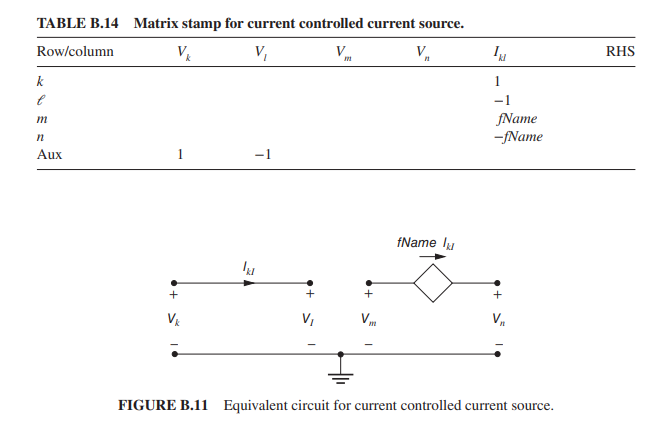

In [ ]:
if valid and type_of_circuit == "AC":
    for F in cccs:
        for voltage_ac in voltages_ac:
            if voltage_ac.name == F.name:
                index = voltages_ac.index(voltage_ac)
            else:
                print("circuit is invalid")
                valid = False;
                exit(0)
        k = node_dict[voltages_ac[index].from_node]
        l = node_dict[voltages_ac[index].to_node]
        A[k, len(node_dict)+index] += 1
        A[l, len(node_dict)+index] += 1
        A[node_dict[F.from_node], len(node_dict)+index] += F.value
        A[node_dict[F.to_node], len(node_dict)+index] += -F.value
        A[len(node_dict)+index, k] += 1
        A[len(node_dict)+index, l] += -1

# Solving the Nodal matrix

After obtaining the nodal matrix,

We know that current sources = [conductance_matrix]*[nodal_voltages]

nodal_voltages = current sources*(inv(conductance_matrix))

Using np.linalg.solve we can solve the above nodal voltages.

after obtaining the solution printing, the nodal voltages and auxiliary currents through both dependent and independent voltage sources.


In [ ]:
if valid:
    B = B[1:no_of_rows]
    A = A[1:no_of_rows, 1:no_of_rows]
    try:
        solution = np.linalg.solve(A, B)
        print(solution)
        print(A)
        print(node_dict)
        print("v0(GND) = 0")
        for i in range(len(node_dict)):
            if i > 0:
                print("node voltage v{}: ".format(i)),
                print(solution[i-1])
        if type_of_circuit == "DC":
            for j in range(len(voltages)):
                print("current through {}:".format(voltages[j].name)),
                print(solution[i+j])
        if type_of_circuit == "AC":
            for j in range(len(voltages_ac)):
                print("current through {}".format(voltages_ac[j].name)),
                print(solution[i+j])
        for k in range(len(vcvs)):
            print("current through vcvs {}".format(vcvs[k].name)),
            print(solution[i+j+k])
        for l in range(len(ccvs)):
            print("current through ccvs {}".format(ccvs[k].name)),
            print(solution[i+j+k+l-1])

    except np.linalg.LinAlgError:
        print("your circuit doesn't have unique solution")



[-1.00000000e+01 -5.02923977e+00 -2.57309942e+00 -1.40350877e+00
 -9.35672515e-01 -4.97076023e-03]
[[ 0.001  -0.001   0.      0.      0.     -1.    ]
 [-0.001   0.0025 -0.001   0.      0.      0.    ]
 [ 0.     -0.001   0.0025 -0.001   0.      0.    ]
 [ 0.      0.     -0.001   0.0025 -0.001   0.    ]
 [ 0.      0.      0.     -0.001   0.0015  0.    ]
 [-1.      0.      0.      0.      0.      0.    ]]
{'GND': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
v0(GND) = 0
node voltage v1: 
-10.0
node voltage v2: 
-5.029239766081871
node voltage v3: 
-2.5730994152046787
node voltage v4: 
-1.403508771929825
node voltage v5: 
-0.9356725146198834
current through V1:
-0.004970760233918128
